# Excerise 5 -- estimation of a keynesian consumption equation
* Joakim Blix Prestmo
* 01.11.2018

In [1]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [49]:
df = pd.read_excel("../MakroData.xlsx", sheet_name="Ark5")
df_macro = pd.read_excel("http://www.ssb.no/statbank/sq/10010628/", skiprows=3, nrows=162)

In [50]:
df.head()

,PBOL,K83,RD300,RAM300,NB,BEF1574,NT,ntot,BF300,BG300,...,Y66,Y65,Y6,DEFLATOR,ww,YE,yei300,yei100,RENREALLONG,pbkgamma
1978-01,0.10272,1.247729e+06,30660.23088,78.5,4055.18675,2892.92766,ND,1868.51558,137245.84375,117992.60156,...,4001.10214,1840.03003,51160.40262,0.218255,40.73216,7169.00218,6879.75,688.25,G 0.00500,0.025
1978-02,0.10702,1.262613e+06,31641.81006,78.5,4059.21146,2897.92249,ND,1884.55472,139720.28125,121831.46875,...,2951.41052,1839.29358,54685.59631,0.225750,41.68868,10115.45120,6879.75,688.25,0.005,0.025
1978-03,0.11116,1.279843e+06,31853.51051,78.5,4063.28041,2902.97249,ND,1865.15321,140142.43750,124409.70313,...,3647.62540,2012.99174,57741.30455,0.240648,48.71819,16528.32300,6879.75,688.25,0.005,0.025
1978-04,0.11499,1.296472e+06,32344.44765,78.5,4067.34930,2908.05008,ND,1888.17652,147638.00000,131623.71875,...,3009.86194,2189.68465,58799.68775,0.231967,42.13985,15809.21684,6879.75,688.25,0.005,0.025
1979-01,0.11844,1.308271e+06,32802.68954,149.0,4070.19727,2912.91681,ND,1891.77716,153980.68750,132862.85938,...,3549.74414,2064.86436,57865.93527,0.230633,41.76708,13676.67289,6879.75,844.25,0.005,0.025


In [51]:
df_macro['Unnamed: 0'] = df_macro['Unnamed: 0'].str.replace('K','Q')
df_macro = df_macro.drop(['Unnamed: 0'], axis=1)
df_macro.index = pd.Index(pd.period_range('1978-01', periods=210, freq='Q'))

In [52]:
df.index = pd.Index(pd.period_range('1978-01', periods=156, freq='Q'))


# Figures


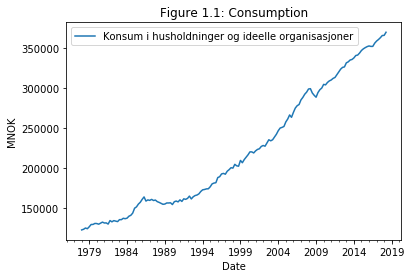

In [53]:
# Add title and legend
df_macro['Konsum i husholdninger og ideelle organisasjoner'].plot()
plt.title("Figure 1.1: Consumption")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')
plt.show()


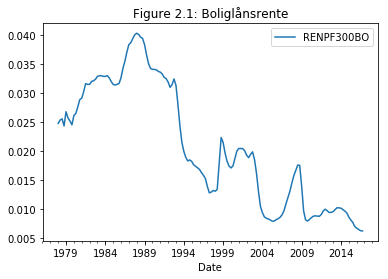

In [54]:
# Add title and legend
df['RENPF300BO'].plot()
plt.title("Figure 2.1: Boliglånsrente")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('')
plt.show()

In [56]:
df_merge=df.merge(df_macro, how='left', on=None, left_on=None, left_index=True, right_index=True)

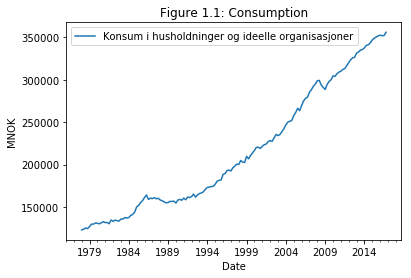

In [57]:
# Add title and legend
df_merge['Konsum i husholdninger og ideelle organisasjoner'].plot()
plt.title("Figure 1.1: Consumption")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')
plt.show()

# Features engineering


In [59]:
# Create growth rates:
# df[log_C] = ...
df_merge['DC'] = np.log(df_merge['Konsum i husholdninger og ideelle organisasjoner']).diff(4)
df_merge['RD300-RAM300'] = (df_merge['RD300']-df_merge['RAM300'])/df_merge['KPI']
df_merge['DRD300'] = np.log(df_merge['RD300-RAM300']).diff(4)

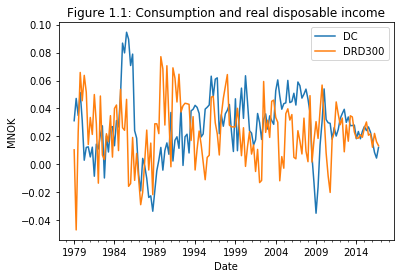

In [60]:
df_merge['DC'].plot()
df_merge['DRD300'].plot()
plt.title("Figure 1.1: Consumption and real disposable income")
plt.legend()
plt.xlabel('Date', fontdict=None, labelpad=None)
plt.ylabel('MNOK')
plt.show()

In [62]:
import statsmodels.api as sm # import statsmodels 


In [103]:
DC = df_merge["DC"] ## X usually means our input variables (or independent variables)
DRD300 = df_merge["DRD300"] ## Y usually means our output/dependent variable
DC = sm.add_constant(DC) ## let's add an intercept (beta_0) to our model



In [77]:
df_merge.head()

,PBOL,K83,RD300,RAM300,NB,BEF1574,NT,ntot,BF300,BG300,...,Konsum i offentlig forvaltning,Bruttoinvestering i fast realkapital,Lagerendring og statistiske avvik,Eksport i alt,Import i alt,"Bruttonasjonalprodukt, markedsverdi","Bruttonasjonalprodukt Fastlands-Norge, markedsverdi",DC,RD300-RAM300,DRD300
1978Q1,0.10272,1.247729e+06,30660.23088,78.5,4055.18675,2892.92766,ND,1868.51558,137245.84375,117992.60156,...,68961.0,85491.0,23188.0,73295.0,69888.0,293066.0,263367.0,NaN,140119.236622,NaN
1978Q2,0.10702,1.262613e+06,31641.81006,78.5,4059.21146,2897.92249,ND,1884.55472,139720.28125,121831.46875,...,67663.0,83135.0,3245.0,97233.0,71259.0,297817.0,266308.0,NaN,139815.368194,NaN
1978Q3,0.11116,1.279843e+06,31853.51051,78.5,4063.28041,2902.97249,ND,1865.15321,140142.43750,124409.70313,...,69510.0,82682.0,20378.0,80527.0,66907.0,301391.0,267246.0,NaN,132039.543375,NaN
1978Q4,0.11499,1.296472e+06,32344.44765,78.5,4067.34930,2908.05008,ND,1888.17652,147638.00000,131623.71875,...,70443.0,87285.0,15558.0,84079.0,69818.0,301788.0,272114.0,NaN,139097.166735,NaN
1979Q1,0.11844,1.308271e+06,32802.68954,149.0,4070.19727,2912.91681,ND,1891.77716,153980.68750,132862.85938,...,70977.0,82501.0,16138.0,82192.0,67213.0,300470.0,273996.0,0.03122,141582.910483,0.010392


In [102]:
# df_merge.drop(pd.Date('1978Q1'))
df_merge = df_merge.drop(df_merge.index[[0,1,2,3]])    


In [104]:
DC.shape, DRD300.shape


((152, 2), (152,))

In [106]:
# Note the difference in argument order
model = sm.OLS(DC, DRD300).fit() ## sm.OLS(output, input)


In [107]:
#predictions = model.predict(DC)

# Print out the statistics
model.summary()

ValueError: shapes (152,2) and (152,2) not aligned: 2 (dim 1) != 152 (dim 0)